## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

In [2]:
import matplotlib.colors as mcolors

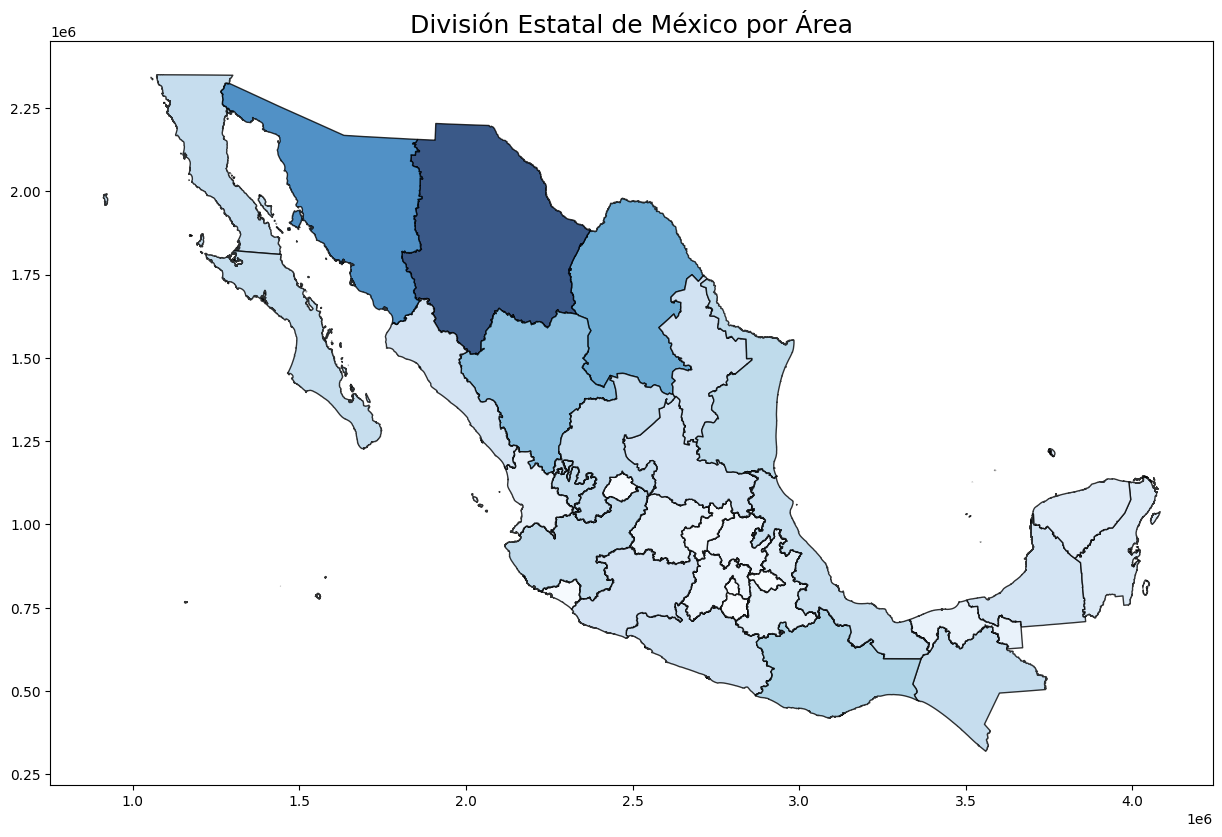

In [3]:
estados=gpd.read_file('Estados/conjunto_de_datos')
estados['area'] = estados.geometry.area

# La función de matplotlib requiere que normalicemoz para aplicar heatmap
norm=mcolors.Normalize(vmin=estados['area'].min(), vmax=estados['area'].max())
cmap=plt.cm.Blues
estados['color']=estados['area'].apply(lambda x: cmap(norm(x)))

fig, ax = plt.subplots(figsize=(15, 10))
estados.plot(ax=ax, color=estados['color'], edgecolor='black', alpha=0.8)
ax.set_title("División Estatal de México por Área", fontsize=18)

plt.show()

#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [4]:
escuelas = gpd.read_file('Escuelas/conjunto_de_datos/denue_inegi_61_.shp')
escuelas_utm = escuelas.to_crs(epsg=6362)  # EPSG 6362 es el de méxico

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f69fa130670>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# Hacemos un buffer de 10 km de las escuelas
escuelas_buffer = escuelas_utm.buffer(5000) 
# Graficamos
fig, ax = plt.subplots(figsize=(15, 10))
escuelas_buffer.plot(ax=ax, color='purple', edgecolor='black', alpha=0.6)
ax.set_title("Escuelas secundarias con un radio de 10 km", fontsize=18)
plt.show()

In [ ]:
escuelas_union = escuelas_buffer.unary_union
area_total_cubierta = escuelas_union.area / 1e6  # Convertir de m^2 a km^2

estados = gpd.read_file('Estados/conjunto_de_datos')
estados_utm = estados.to_crs(epsg=32614)  
area_total_pais = estados_utm.unary_union.area / 1e6  # Convertir de m^2 a km^2

porcentaje_cubierto = (area_total_cubierta / area_total_pais) * 100

#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [ ]:
estados["centroide"] = estados.centroid

centroide_CDMX=estados[estados["NOMGEO"] == 'Ciudad de México']['centroide'].reset_index(drop=True)
estados['distancia_cdmx']=estados['centroide'].apply(lambda x: centroide_CDMX.distance(x) / 1000) 
print(estados[['NOMGEO', 'distancia_cdmx']])

#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

In [11]:
data = gpd.read_file('Servicios/conjunto_de_datos/denue_inegi_54_.shp')


In [12]:
mexico_crs = "EPSG:6362"
servicios=data.to_crs(mexico_crs)

In [9]:
data.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,62604,02002541110001451000000000U1,DESPACHO DE ABOGADOS MARTÍNEZ GAMEZ Y ASOCIADOS,None,541110,Bufetes jurídicos,6 a 10 personas,CALZADA,INDEPENDENCIA,CALLE,...,0292,029,6865820202,MARTINEZGAMEZABOGADOS@HOTMAIL.COM,None,Fijo,32.644294,-115.502513,2010-07,POINT (-115.50251 32.64429)
1,76528,02001541370000051000000000U2,PROYECTOS TOPOGRAFICOS DEL NOROESTE,None,541370,Servicios de elaboración de mapas,0 a 5 personas,AVENIDA,REFORMA,CALLE,...,7790,044,None,None,None,Fijo,31.871234,-116.608694,2014-12,POINT (-116.60869 31.87123)
2,8797410,05035541920000981000000000U7,REVISTA MAAT,None,541920,Servicios de fotografía y videograbación,0 a 5 personas,BOULEVARD,CONSTITUCION,CALLE,...,1420,004,None,None,None,Fijo,25.548756,-103.450350,2019-11,POINT (-103.45035 25.54876)
3,8210799,03008541610000471000000000U5,OFICINAS ADMINISTRATIVAS SISTEMAS DM,DISCOVERING MEXICO DESTINATORY CLUB SAPI DE CV,541610,Servicios de consultoría en administración,0 a 5 personas,CALLE,VIA DE LERRY,CALLE,...,1015,026,6241580799,None,None,Fijo,22.885341,-109.929122,2019-11,POINT (-109.92912 22.88534)
4,93346,02001541941000281000000000S3,HOBBISSIMO VETERINARIA Y ACUARIO,None,541941,Servicios veterinarios para mascotas prestados...,0 a 5 personas,CALLE,NINGUNO,CALLE,...,0628,008,6461611430,HOBBISSIMO.ENS@GMAIL.COM,WWW.HOBBISSIMO.COM.MX,Fijo,31.866449,-116.660657,2014-12,POINT (-116.66066 31.86645)


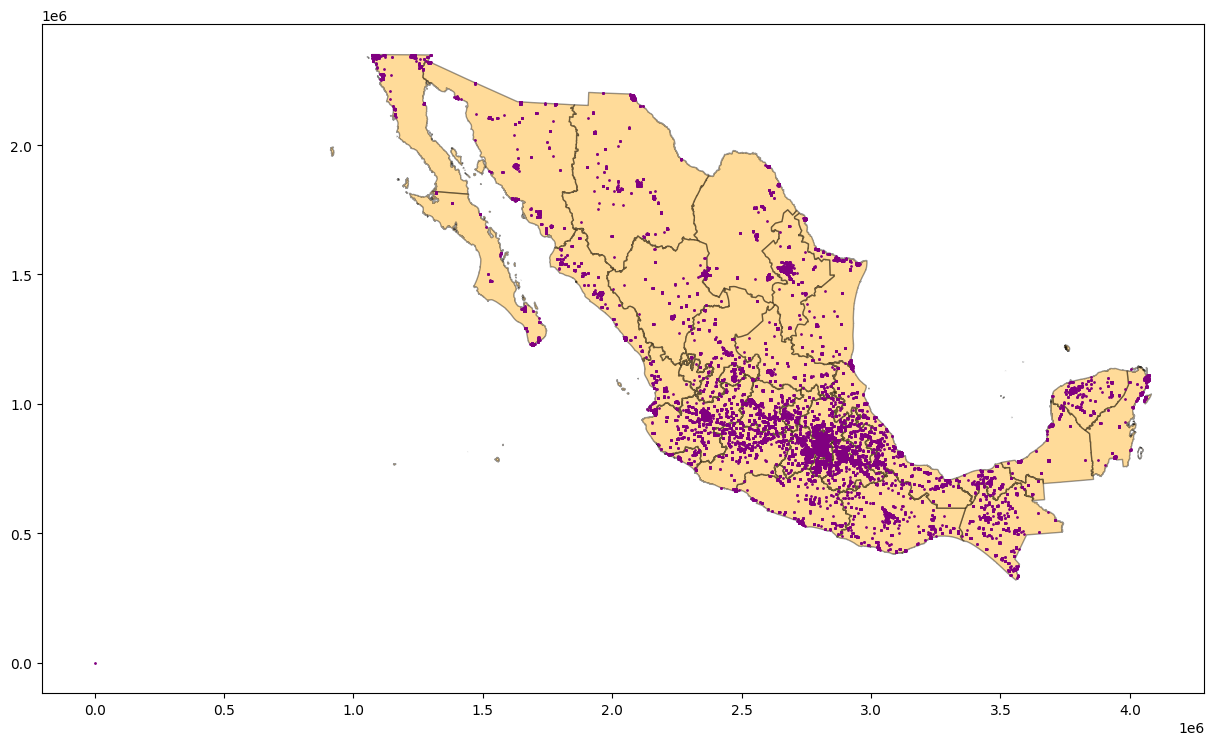

In [13]:
#escuelas = escuelas.to_crs(mexico_crs)
estados = estados.to_crs(mexico_crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
estados.plot(ax=ax, color='orange', edgecolor='black', alpha=0.4)
servicios.plot(ax=ax, color='purple', markersize=1, label='Servicios')

plt.show()

In [ ]:
#Partes del código son copiadas del ipynb "clase"
escuelas_in_ent = gpd.sjoin(escuelas, estados, how='inner', predicate='within')

# Define the regex patterns
regex_primaria = r"(?i)(primaria|escuela básica|escuela elemental)"
regex_secundaria = r"(?i)(secundaria|escuela media|educación media)"
regex_prep_bach = r"(?i)(preparatoria|bachillerato|prepa|colegio)"


# Function to determine color based on regex matching
def assign_color(row):
    if pd.notna(row['nom_estab']):
        if re.search(regex_prep_bach, row['nom_estab']):
            return 'blue'  # Color for Prepa
        elif re.search(regex_secundaria, row['nom_estab']):
            return 'green'  # Color for Secundaria
        elif re.search(regex_primaria, row['nom_estab']):
            return 'red'  # Color for Primaria
    return 'gray'  # Color if none match

# Apply the function to each row
#escuelas_in_ent['color'] = escuelas_in_ent.apply(assign_color, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
estados.plot(ax=ax, color='orange', edgecolor='black', alpha=0.4)
#escuelas_sin_gris = escuelas_in_ent[escuelas_in_ent['color']!='gray']
#escuelas_sin_gris.plot(ax=ax, color=escuelas_sin_gris['color'], markersize=1, legend=True)
servicios.plot(ax=ax, color='purple', markersize=1, label='Servicios')


legend_patches = [
    mpatches.Patch(color='red', label='Primaria'),
    mpatches.Patch(color='green', label='Secundaria'),
    mpatches.Patch(color='blue', label='Preparatoria'),
]
ax.set_aspect('equal')
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)
ax.set_title("Escuelas en México", fontsize=18)

plt.show()

Al observar la gráfica resultante, se puede notar una clara tendencia de las escuelas (primarias, secundarias y preparatorias) a ubicarse cerca de áreas con alta concentración de servicios profesionales, científicos y técnicos. Esta proximidad sugiere una posible correlación entre la disponibilidad de estos servicios y la presencia de instituciones educativas. Es razonable inferir que la localización de servicios especializados y avanzados puede atraer o desarrollarse en paralelo con la infraestructura educativa, ya que tanto los estudiantes como los profesionales podrían beneficiarse mutuamente de esta cercanía. Esta relación podría ser particularmente relevante en zonas urbanas, donde la densidad de servicios y escuelas es mayor, promoviendo un entorno que favorece tanto la educación como el desarrollo profesional.